Example: $\chi^2$ Fit of a Straight Line
==============================


In [1]:
# the usual setup
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

We generate our own dataset. How this is done is not important - after all we want to extract the information in this cell from our fit. But we can later see that our extracted results are meaningful.

In [2]:
#x = np.array( [ 0.21, 0.82, 1.66, 2.20, 2.70, 3.84, 4.32 ] )
N = 10   # number of data points
M = 0.4  # slope
A = 1.1  # axis offset

np.random.seed(99)
x  = np.random.uniform( 0.0, 5.0, N )
ey = np.random.uniform( 0.1, 1.0, N )
y  = np.random.normal(A*x + M, ey)

# Dataset

It's always a good idea to plot your data before you do anything else. 

Text(0, 0.5, 'y')

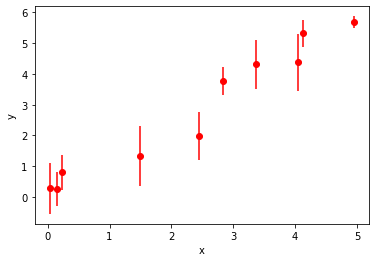

In [3]:
plt.errorbar(x,y,ey,0,"ro")
plt.xlabel("x")
plt.ylabel("y")

## Straight line fit to the data points

We can do a straight line fit to the data points, as you have probably done a million times in your lab practicals.

In [4]:
def f(x,a,m):
    return a + x*m

popt,pcov = scipy.optimize.curve_fit( f, x,y, sigma=ey )

The fit gives you the optimal set of parameters and a covariance matrix.

In [5]:
print("Optimal fit parameters:", popt)
print("Covariance Matrix:",pcov)

Optimal fit parameters: [0.2852716  1.10545289]
Covariance Matrix: [[ 0.06422299 -0.01413667]
 [-0.01413667  0.00377214]]


# Fit visualization

And it also helps to plot the fit together with the data points.

Text(0, 0.5, 'y')

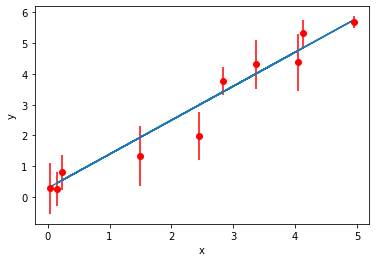

In [6]:
plt.errorbar(x,y,ey,0,"ro")
plt.plot(x,f(x,*popt))
plt.xlabel("x")
plt.ylabel("y")

We see that scipy.optimize does a good job at fitting the straight line to the data points. But many students use this as a black box, and we want to understand better what's going on behind the scences.

## The $\chi^2$ Distribution

We have seen in the lecture that the concept behind these fits is the $\chi^2$ distribution. As a reminder, it is defined as
$$
\sum_{i=1}^n{\frac{(y_i-f(x_y,\vec p))^2}{\sigma_i^2}}
$$

We can define a function chi2 that does this calculation for us.

In [7]:
def chi2(a,m):
    return np.sum( ( (y-f(x,a,m)) / ey )**2 )

We can try a few different values of a and m to confirm that scipy.optimize actually found the minimum of chi2.

In [8]:
print(chi2(0.285, 1.105))
print(chi2(1.1,1.1))

4.746778569780138
38.04353989872491


# Visualization of $\chi^2$

As for the data points itself, it can be helpful to plot chi2.

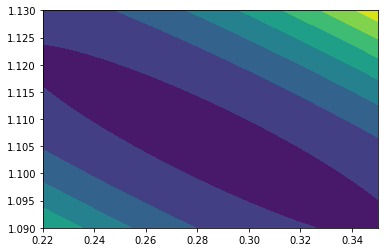

In [9]:
import pylab

aa = np.linspace(0.22,0.35,60)
mm = np.linspace(1.09,1.13,60)
cc = np.zeros((len(aa),len(mm)))
for ia,a in enumerate(aa):
    for im,m in enumerate(mm):
        cc[im,ia] = chi2(a,m)
pylab.contourf(aa,mm,cc)

We can see that the minimum of chi2 is where scipy.optimize found it. But we still do not know how scipy.optimize found the minimum, or how it derived the errors (given in the form of the covariance matrix). 